# Lab 10 (module 11)
Hao-Tien Kuo

## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('county_level_election.csv')

In [2]:
df.head()

,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,votergap,trump,clinton
0,Colorado,8117,Summit County,27239,15.173,4.918,45.996,2.5,68352,5.4,48.1,8.1,13.1,46.0,46.2,-27.632,31.530,59.162
1,Colorado,8037,Eagle County,53653,30.040,5.169,47.231,3.1,76661,10.1,47.3,9.4,11.8,31.0,47.1,-19.897,36.058,55.955
2,Idaho,16067,Minidoka County,19226,34.070,5.611,49.318,3.7,46332,24.1,11.8,18.3,34.2,80.0,61.8,54.148,71.135,16.987
3,Colorado,8113,San Miguel County,7558,10.154,4.747,46.808,3.7,59603,4.7,54.4,12.4,16.7,5.7,62.6,-44.769,23.892,68.662
4,Utah,49051,Wasatch County,21600,13.244,4.125,48.812,3.4,65207,9.5,34.4,13.9,23.0,257.8,68.3,25.357,50.471,25.114


In [7]:
# Estimate the national overall votergap, assuming the entire population voted?

np.dot(df['population'], df['votergap']) / df['population'].sum()

-2.7885068043713823

In [8]:
df[['state', 'county']].value_counts()

state     county           
Alabama   Autauga County       1
Ohio      Paulding County      1
          Mercer County        1
          Miami County         1
          Monroe County        1
                              ..
Kentucky  Lincoln County       1
          Livingston County    1
          Logan County         1
          Lyon County          1
Wyoming   Weston County        1
Length: 3066, dtype: int64

In [9]:
df[['state', 'county', 'fipscode']].value_counts()

state     county             fipscode
Alabama   Autauga County     1001        1
Ohio      Paulding County    39125       1
          Mercer County      39107       1
          Miami County       39109       1
          Monroe County      39111       1
                                        ..
Kentucky  Lincoln County     21137       1
          Livingston County  21139       1
          Logan County       21141       1
          Lyon County        21143       1
Wyoming   Weston County      56045       1
Length: 3066, dtype: int64

In [10]:
# What is the average votergap, assuming all counties are weighted equally?

df['votergap'].mean()

31.723198303979103

In [11]:
# What is the average votergap, assuming all states are weighted equally?

df_states = pd.DataFrame()
df_states['state'] = df['state']
df_states['votergap_n'] = df['population'] * df['votergap']
df_states['population'] = df['population']

np.mean(df_states.groupby(['state'])['votergap_n'].sum() / df_states.groupby(['state'])['population'].sum())

2.9734235672898257

## Decision Trees
We are going to be using test and training splits, cross validation, and fitting a decision tree regressor to the data.

In [60]:
# Create an 80/20 Train/Test split. 
# Using 10 folds cross validation fit decision trees having depths between 1 and 20 nodes.

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor

X = df.drop(columns=['state', 'fipscode', 'county', 'votergap', 'trump', 'clinton']).values
y = df['votergap'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [61]:
regr = DecisionTreeRegressor(max_depth=20, random_state=1)
model = regr.fit(X_train, y_train)

In [62]:
model.score(X_train, y_train) 

0.9967362727175921

In [63]:
model.score(X_test, y_test) 

0.5465072503718709

In [64]:
cross_val_score(model, X, y, cv=10).mean()

0.5218916617167779

In [65]:
# Plot the number of nodes (max depth) on the X axis against the accuracy on the y axis, 
# with separate lines for the training data and the mean cross validation.

acc_train = {}
acc_cv = {}

for i in range(20):
    regr_i = DecisionTreeRegressor(max_depth=i+1, random_state=1)
    regr_i.fit(X_train,y_train)
    
    score_train = regr_i.score(X_train, y_train)
    acc_train[i+1] = score_train
    
    score_CV = cross_val_score(estimator=regr_i, X=X, y=y, cv=10)
    acc_cv[i+1] = score_CV.mean()

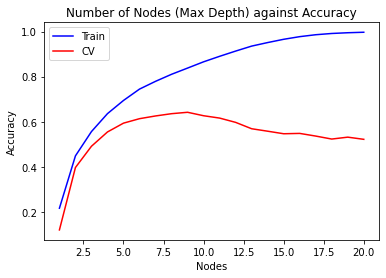

In [66]:
plt.plot(acc_train.keys(), acc_train.values(), color='b', label='Train')
plt.plot(acc_cv.keys(), acc_cv.values(), color='r', label='CV')
plt.xlabel('Nodes')
plt.ylabel('Accuracy')
plt.title('Number of Nodes (Max Depth) against Accuracy')
plt.legend()
plt.show()

In [67]:
 {i for i in acc_cv if acc_cv[i]==max(acc_cv.values())}

{9}

Based on the plot, how many nodes would you recommend as the max depth?

- When there are 9 nodes, the model has the highest validation accuracy. 

The cross validation starts to fall off at a certain point, why?

- When number of nodes increases, the model becomes more flexible and more complex, and to a certain point it will overfit the training data. Thus, we see higher training accuracy but decreasing validation accuracy on the right side of the plot.